In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cardekho_Dataset.csv')
#data=pd.read_csv("Car-details-v3.csv")

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


## Step-2: Data Cleaning & EDA 

In [4]:
data.shape

(8128, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


## Checking Missing Values



In [6]:
(data.isnull().sum()/len(data))*100

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64

In [7]:
data['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [8]:
data["transmission"].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [9]:
data['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [10]:

data['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [13]:
data['max_power'] = data['max_power'].replace({" ": np.NaN})

In [14]:
data.dropna(inplace=True)

In [15]:
(data.isnull().sum()/len(data))*100

name                  0.0
year                  0.0
selling_price         0.0
km_driven             0.0
fuel                  0.0
seller_type           0.0
transmission          0.0
owner                 0.0
mileage(km/ltr/kg)    0.0
engine                0.0
max_power             0.0
seats                 0.0
dtype: float64

In [16]:
data.drop(columns=['name'], inplace=True)

In [17]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [18]:
cat_cols = ['year','fuel','seller_type','transmission','owner']
num_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']

## Inspecting Target variable

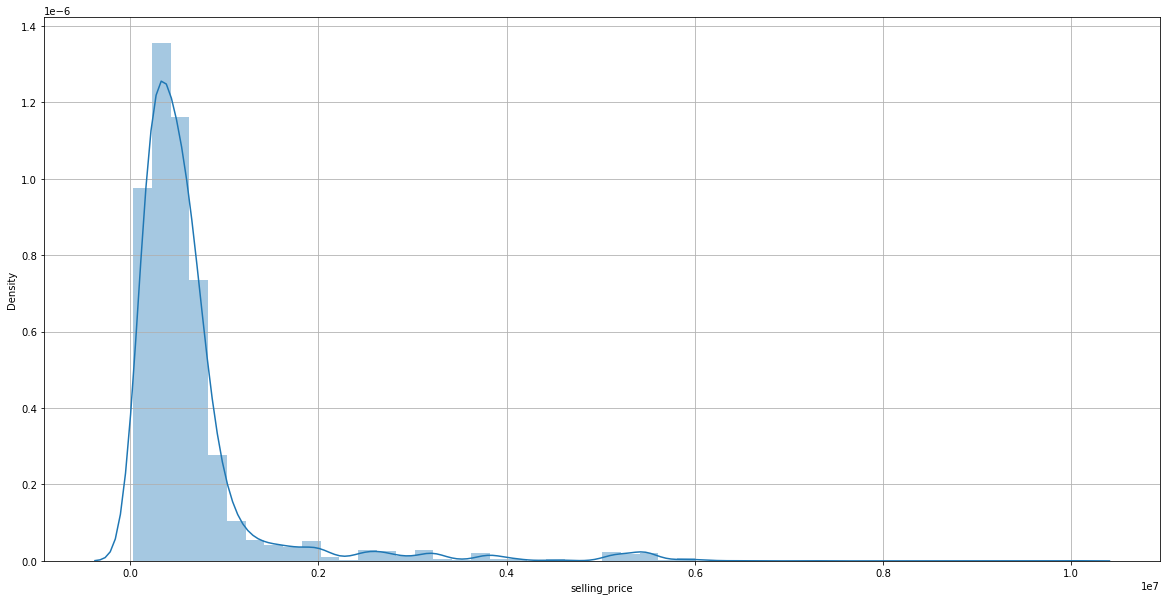

In [19]:
plt.figure(figsize = [20,10])

sns.distplot(data['selling_price'])
plt.grid()
plt.show()


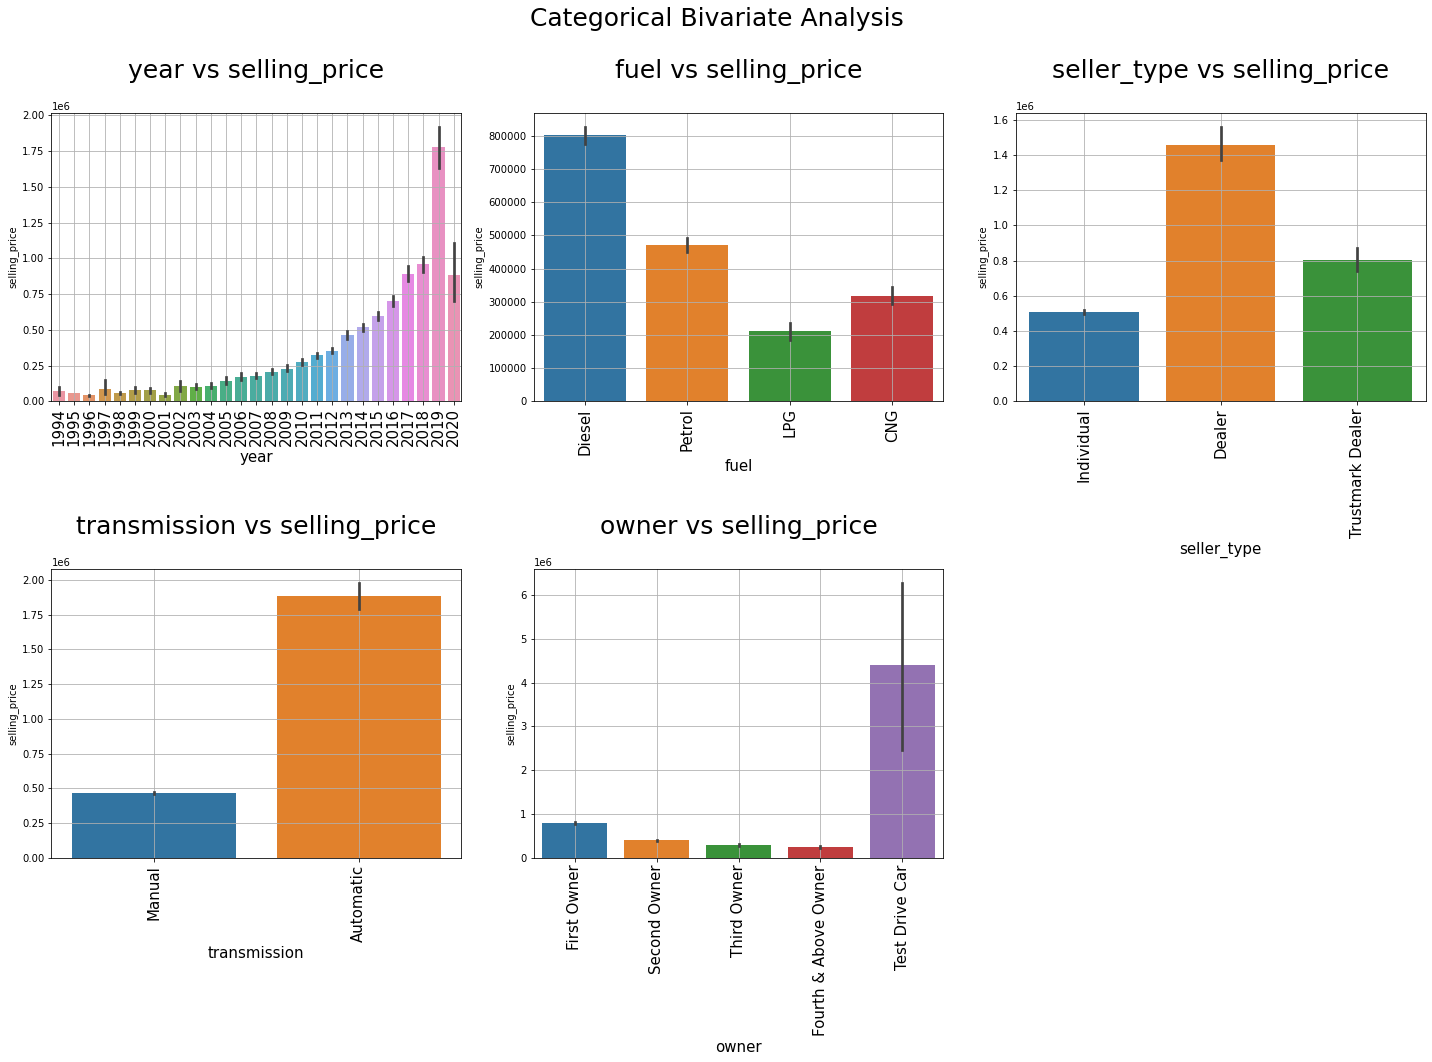

In [20]:
plt.figure(figsize = [20,15])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=25)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=data[col],y=data['selling_price'])
        plt.title(f'{col} vs selling_price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        plt.grid()
        
        
plt.tight_layout()
plt.show()

<AxesSubplot:>

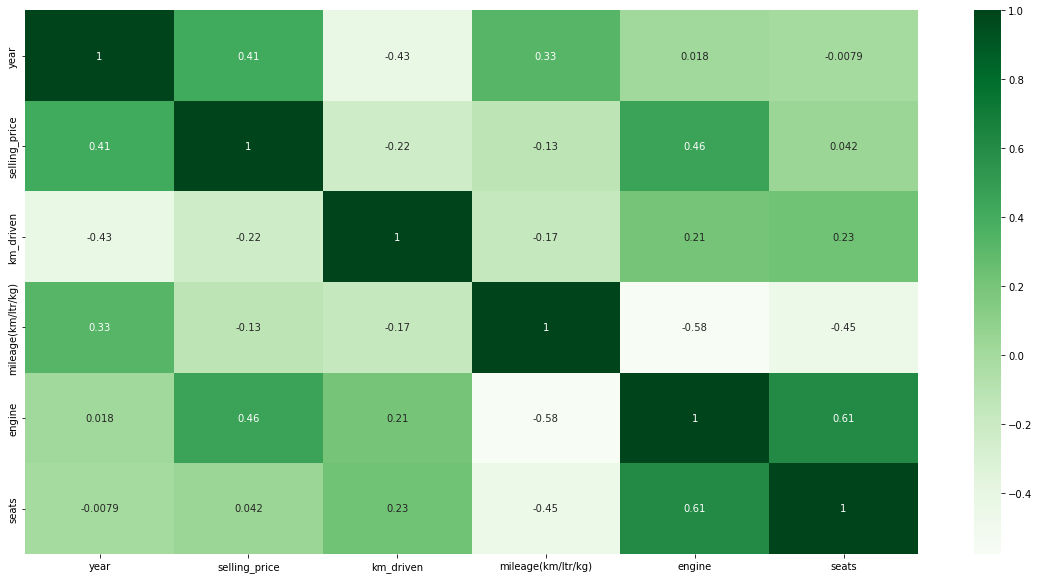

In [21]:
plt.figure(figsize = [20,10])
sns.heatmap(data.corr(),cmap='Greens', annot=True)

# Step-3: Data Preprocessing

In [22]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [23]:
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)

In [24]:
data.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)

In [25]:
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [26]:
data.replace({'owner':{'First Owner':0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)

In [27]:
data.dropna()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,1,1,0,0,23.40,1248.0,74,5.0
1,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,0,1,0,2,17.70,1497.0,78,5.0
3,2010,225000,127000,1,1,0,0,23.00,1396.0,90,5.0
4,2007,130000,120000,0,1,0,0,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0,1,0,0,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,1,1,0,3,16.80,1493.0,110,5.0
8125,2009,382000,120000,1,1,0,0,19.30,1248.0,73.9,5.0
8126,2013,290000,25000,1,1,0,0,23.57,1396.0,70,5.0


In [28]:
data.isnull().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

# Step-4: Splitting Dataset into Train & Test sets

In [29]:
y = data['selling_price']
x = data.drop(columns='selling_price')

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(6324, 10)
(1582, 10)
(1582,)
(6324,)


## Model Building

In [32]:
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as model_selection

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred=lm.predict(x_test)
#print (x_test) #test dataset
print (y_pred) #predicted values

[695634.80944847 350972.6466316  771612.92574242 ... 141759.40464695
 525452.04497486 533805.06007318]


In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 279560.0279324152
Mean Squared Error: 223625142754.09293
Root Mean Squared Error: 472890.20158393314
r2_score: 0.6778757647781724
